# Blurring and Smoothing with OpenCV

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Let's gather some information about the image after it gets loaded. We're interested in data types.
# cv2.imread uses unsigned 8-bit integer to represent color values (values are from 0 to 255)
test = cv2.imread('../data/bricks.jpg')
print(f'type(test[0, 0, 0]) = {type(test[0, 0, 0])}')
print(f'test.min() = {test.min()}')
print(f'test.max() = {test.max()}')
f = 253/255
print(f'253/255 = {253/255}')
print(f'type(253/255) = {type(253/255)}')

type(test[0, 0, 0]) = <class 'numpy.uint8'>
test.min() = 0
test.max() = 255
253/255 = 0.9921568627450981
type(253/255) = <class 'float'>


In [15]:
def load_img():
    # Load an image and convert it to one with floating-point elements in range [0,1]; this normalization is necessary because 
    img = cv2.imread('../data/bricks.jpg').astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [ ]:
# uncomment to test that the function works
# load_img()

In [4]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [ ]:
i = load_img()
display_img(i)

## Gamma Correction

Gamma correction allows to increase or decrease what is percieved as brightness of the image.
Gamma < 1 means the image will be brighter.

In [ ]:
gamma = 1/4
result = np.power(i, gamma)
display_img(result)

If gamma > 1 the image will appear darker.

In [ ]:
gamma = 2
result = np.power(i, gamma)
display_img(result)

## Blurring

### Low-pass filter of 2D convolution

We will write some text on the image with the font where we can see lines of the edges of each character. We will be blurring and smoothing these lines.

[Smoothing Images](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html)

LPF (Low-Pass filter; filter where components with low frequencies pass/remain) helps in removing noise, blurring images, etc. HPF (High-Pass Filter) filters help in finding edges in images.


[cv::filter2D](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) convolves the image with the kernel. For pixel p(x, y) in the initial image, it centers the central pixel of the kernel above it, multiplies values of matching kernel elements and pixels, calculates the sum of these values and averages it by the total size of the kernel. If we have kernel of size 5x5, then we'd divide this value by 25. Finally, it assignes this new value (the weighted average of neigbour pixels) to this pixel p(x, y). This is how pixels near the edges get blurred - as they take some of the intensiti of the neighbouring edge color.

https://docs.gimp.org/2.8/en/plug-in-convmatrix.html


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


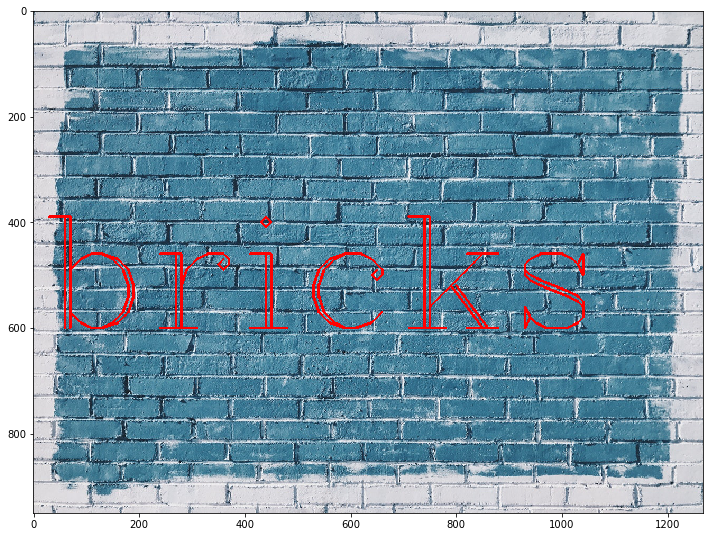

In [5]:
img = load_img()
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text='bricks', org=(10, 600), fontFace=font, fontScale=10, color=(255, 0, 0), thickness=4)
display_img(img)

In [6]:
#
# Setting up the kernel for the low-pass filter
# Type of kernel elements needs to match the type of the elements in the image matrix, so let's first check what that type is:
#
print(f'type(img[0,0,0]) = {type(img[0,0,0])}')

type(img[0,0,0]) = <class 'numpy.float32'>


In [ ]:
kernel = np.ones(shape=(5, 5), dtype=np.float32) / 25 

In [ ]:
kernel




[Explanation for ddepth parameter in cv2.filter2d() opencv? - Stack Overflow](https://stackoverflow.com/questions/43392956/explanation-for-ddepth-parameter-in-cv2-filter2d-opencv)

[image type vs image depth - OpenCV forum](https://answers.opencv.org/question/4783/image-type-vs-image-depth/)

In [ ]:
# -1 is destination depth (data type e.g. unsigned short, int...used to represent fundamental color intensity); -1 means that it should be the same as in the input image 
dst = cv2.filter2D(img, -1, kernel)

# the output will look a bit blurred
display_img(dst)

In [ ]:
# reset the image
img = load_img()
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text='bricks', org=(10, 600), fontFace=font, fontScale=10, color=(255, 0, 0), thickness=4)
display_img(img)

## Smoothing based off averaging

There is a default blur kernel, a predefined blur kernel used automatially in `cv2.blur()`:

In [ ]:
blurred = cv2.blur(img, ksize=(5, 5))
# the output will look a bit blurred
display_img(blurred)

In [ ]:
blurred = cv2.blur(img, ksize=(10, 10))
# the output will look a more blurred as the kernel size iz increasing
display_img(blurred)

## Gaussian Blurring

In [ ]:
# reset the image
img = load_img()
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text='bricks', org=(10, 600), fontFace=font, fontScale=10, color=(255, 0, 0), thickness=4)
# display_img(img)

In [ ]:
blurred_gaus = cv2.GaussianBlur(src=img, ksize=(5, 5), sigmaX=10)
display_img(blurred_gaus)

## Median Blurring

Good in blurring the image, removing the noise but keeping the details in check.

In [ ]:
# reset the image
img = load_img()
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text='bricks', org=(10, 600), fontFace=font, fontScale=10, color=(255, 0, 0), thickness=4)
# display_img(img)

In [ ]:
blurred_median = cv2.medianBlur(img, 5)
display_img(blurred_median)

In [ ]:
# example with the image with noise
img = cv2.imread('../data/sammy.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display_img(img)

In [ ]:
# this image is already in RGB
# It is made from previous one by adding a noise (adding random color values at random pixels)
noise_img = cv2.imread('../data/sammy_noise.jpg')
display_img(noise_img)

In [ ]:
# Let's see if we can use median blur to remove this noise
median = cv2.medianBlur(noise_img, 5)
# the output image has the noise removed but it's a bit blurry
display_img(median)

## Bilateral filtering

This is another way to do blurring.
It reduces unwanted noise and keeps edges fairly sharp but is usually slower than other filters.

In [ ]:
# reset the image
img = load_img()
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text='bricks', org=(10, 600), fontFace=font, fontScale=10, color=(255, 0, 0), thickness=4)
display_img(img)

In [ ]:
blur = cv2.bilateralFilter(img, 9, 75, 75)
display_img(blur)